In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

In [3]:
#load Dataset
df=pd.read_csv("C:/emp.csv")
print(df.head())

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

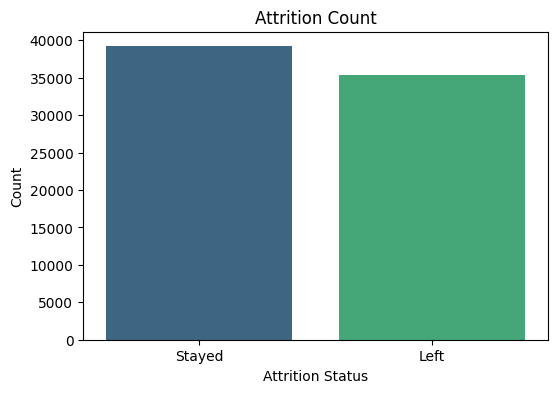

In [4]:
#Data visualization and Descriptive Analysis
#Attrition Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Attrition", palette="viridis", hue="Attrition", legend=False)
plt.title("Attrition Count")
plt.xlabel("Attrition Status")
plt.ylabel("Count")
plt.show()

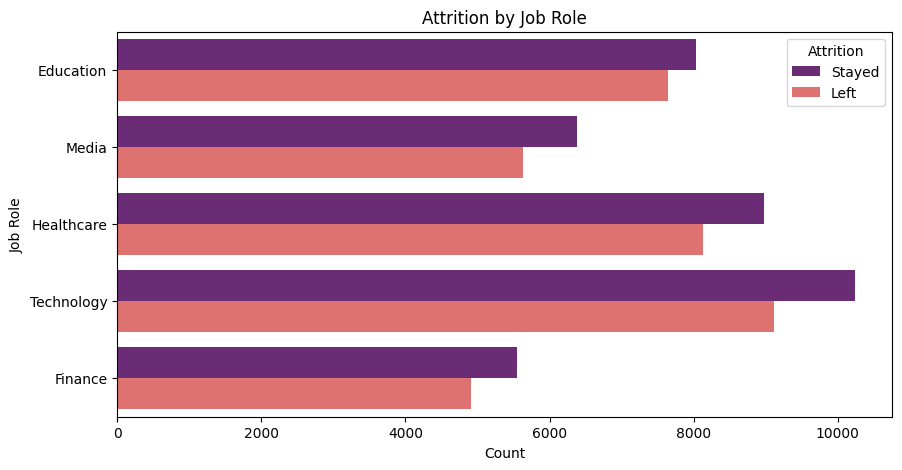

In [5]:
# Attrition by Job Role
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Job Role", hue="Attrition", palette="magma")
plt.title("Attrition by Job Role")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.legend(title="Attrition")
plt.show()

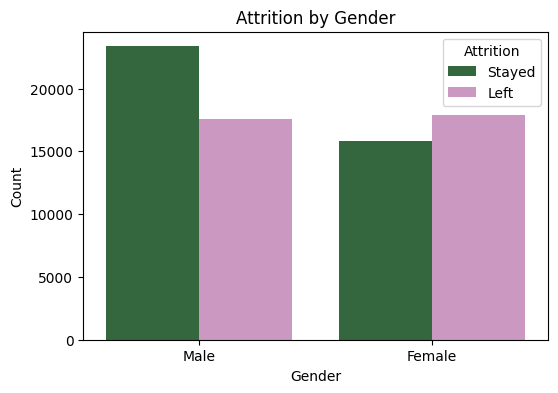

In [6]:
#Gender-based Attrition
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", hue="Attrition", palette="cubehelix")
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

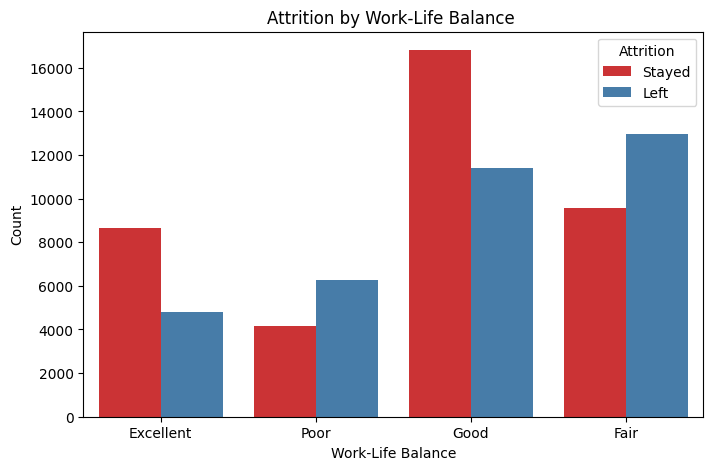

In [7]:
#Attrition by Work-Life Balance
plt.figure(figsize=(8, 5))
sns.countplot(x="Work-Life Balance",data=df,  hue="Attrition", palette="Set1")
plt.title("Attrition by Work-Life Balance ")
plt.xlabel("Work-Life Balance")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

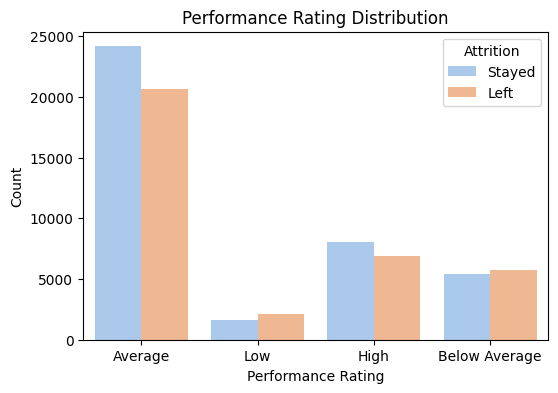

In [8]:
#Performance Rating Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Performance Rating", hue="Attrition", palette="pastel")
plt.title("Performance Rating Distribution")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

In [9]:
#Data Cleaning
# Get the initial number of rows 
initial_rows = df.shape[0] 
# Remove duplicate rows
df.drop_duplicates(inplace=True) 
# Get the number of rows after removing duplicates 
removed_rows = initial_rows - df.shape[0]
# Print how many rows were removed 
print(f"In removed {removed_rows} duplicate rows.") 
# Save the cleaned dataset to a new file 
df.to_csv("after_removed_duplicates.csv", index=False)

In removed 112 duplicate rows.


In [10]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1897
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2381
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


In [11]:
# Remove rows with missing values 
df.dropna(inplace=True)
# Remove columns with missing values 
df.dropna(axis=1, inplace=True)


In [12]:
print(df.head())

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Siz

Outlier Limits for Age:
Lower Bound: -3.5
Upper Bound: 80.5
----------------------------------------
Outlier Limits for Years at Company:
Lower Bound: -17.0
Upper Bound: 47.0
----------------------------------------
Outlier Limits for Monthly Income:
Lower Bound: 822.875
Upper Bound: 13713.875
----------------------------------------
Outlier Limits for Number of Promotions:
Lower Bound: -3.0
Upper Bound: 5.0
----------------------------------------
Outlier Limits for Distance from Home:
Lower Bound: -50.0
Upper Bound: 150.0
----------------------------------------
Outlier Limits for Number of Dependents:
Lower Bound: -4.5
Upper Bound: 7.5
----------------------------------------
Outlier Limits for Company Tenure (In Months):
Lower Bound: -24.0
Upper Bound: 136.0
----------------------------------------


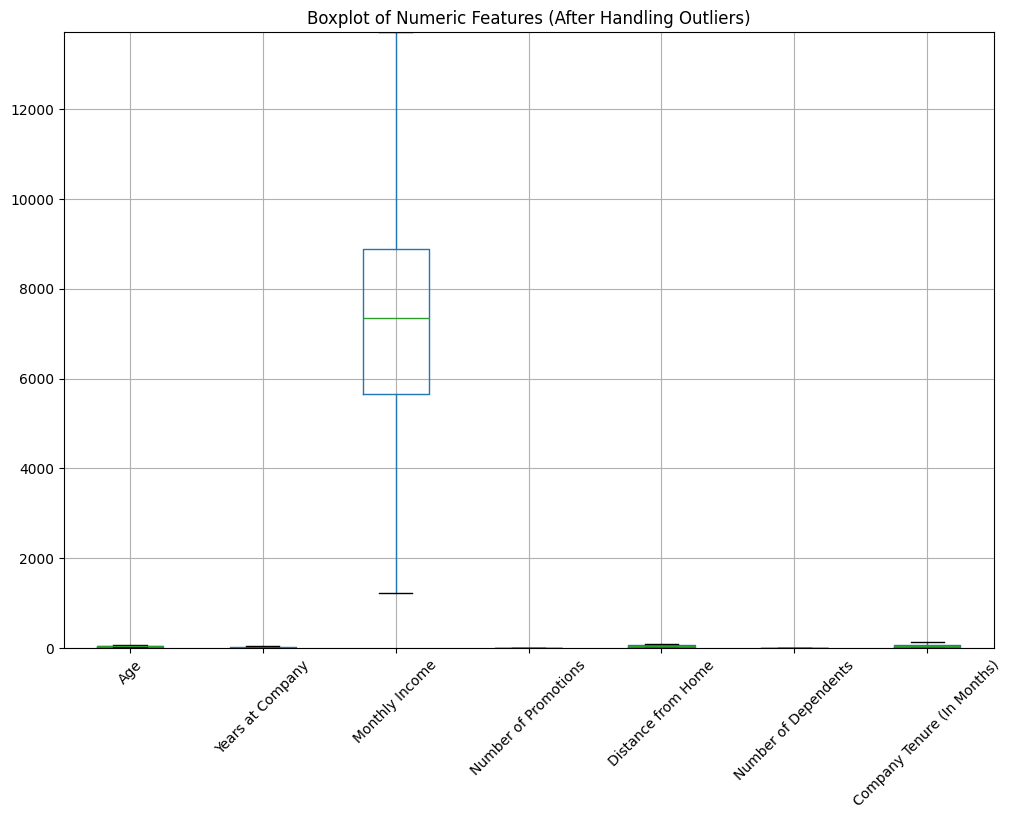

In [13]:
# Identify numeric columns (excluding 'Employee ID' and 'Attrition')
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ['Employee ID', 'Attrition']]

# Apply IQR-based outlier capping to all numerical columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print the limits (lower and upper bounds) for each column
    print(f"Outlier Limits for {col}:")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print('-' * 40)

    # Cap the outliers
    df[col] = df[col].clip(lower_bound, upper_bound)

# Boxplot after handling outliers
plt.figure(figsize=(12, 8))
ax = df[numeric_cols].boxplot(rot=45)

# Dynamically adjust the y-axis range for better visualization of variable distributions
y_min = df[numeric_cols].min().min()  # Get the overall minimum value across all numeric columns
y_max = df[numeric_cols].max().max()  # Get the overall maximum value across all numeric columns
ax.set_ylim(y_min, y_max)  # Set the y-axis limits

plt.title("Boxplot of Numeric Features (After Handling Outliers)")
plt.show()


In [14]:
# Drop the Employee ID column
df.drop(columns=['Employee ID'], inplace=True)

In [15]:
# General dataset summary
print(df.info())

# Summary statistics (numerical columns)
print(df.describe())

# Summary statistics (categorical columns)
print(df.describe(include=['object']))


<class 'pandas.core.frame.DataFrame'>
Index: 70558 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         70558 non-null  int64  
 1   Gender                      70558 non-null  object 
 2   Years at Company            70558 non-null  int64  
 3   Job Role                    70558 non-null  object 
 4   Monthly Income              70558 non-null  float64
 5   Work-Life Balance           70558 non-null  object 
 6   Job Satisfaction            70558 non-null  object 
 7   Performance Rating          70558 non-null  object 
 8   Number of Promotions        70558 non-null  int64  
 9   Overtime                    70558 non-null  object 
 10  Distance from Home          70558 non-null  float64
 11  Education Level             70558 non-null  object 
 12  Marital Status              70558 non-null  object 
 13  Number of Dependents        70558 no

In [16]:
#Feature Engneering and encoding 
# Encode target variable
df['Attrition'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})

Exploring relationships between numerical features and attrition


C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


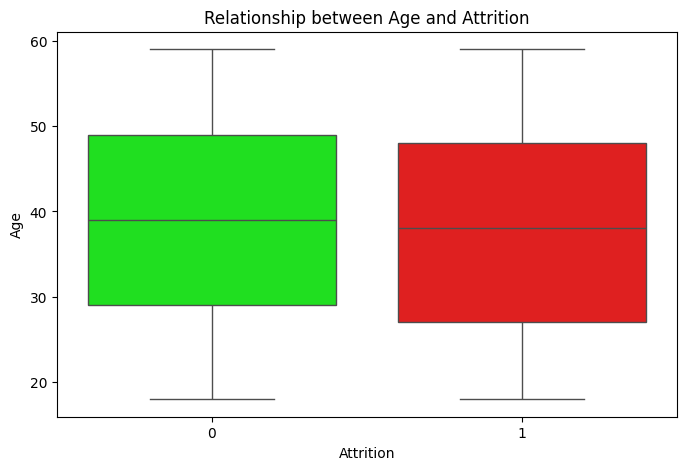

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


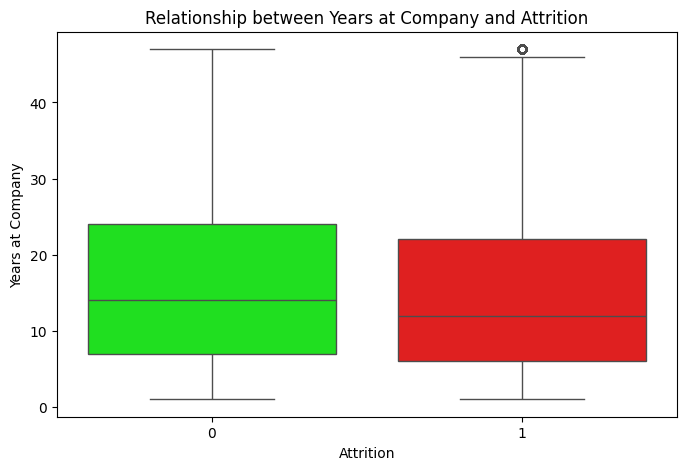

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


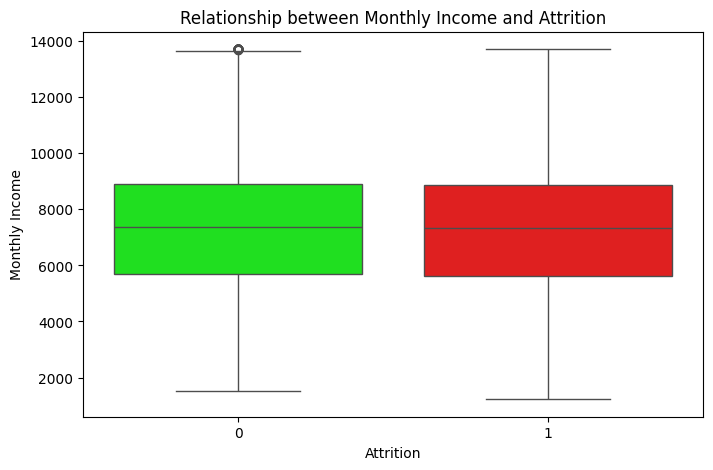

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


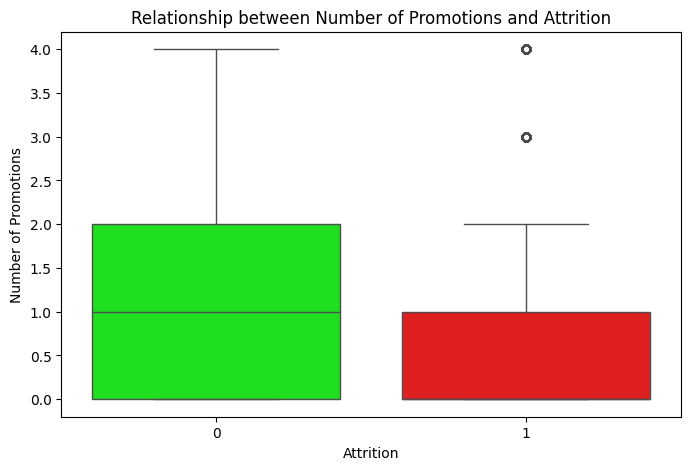

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


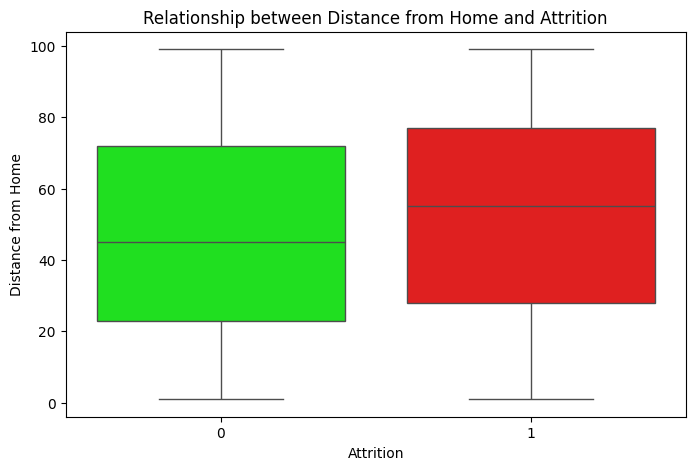

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


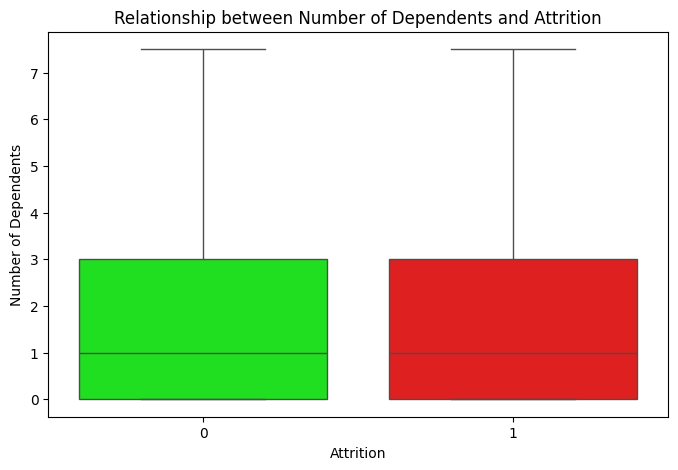

C:\Users\User\AppData\Local\Temp\ipykernel_15156\2008362684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)


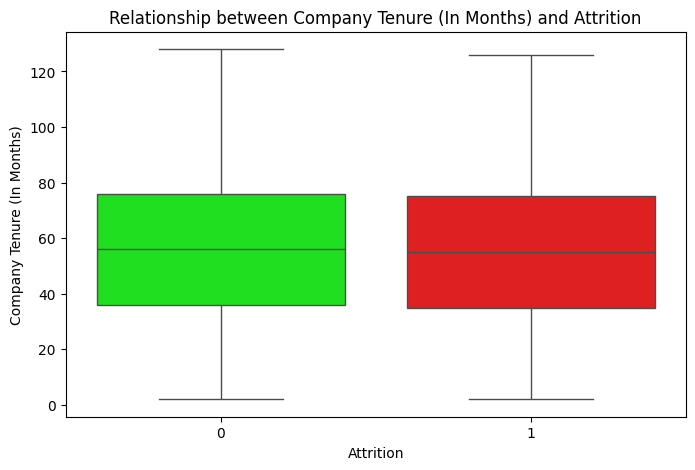

In [17]:
#Exploring Numerical features
print('Exploring relationships between numerical features and attrition')

# Extract only numerical features from df, excluding "Employee ID" and "Attrition"
numerical_features = [col for col in df.select_dtypes(include=['number']).columns 
                      if col not in ['Employee ID', 'Attrition']]

# Define color palette
custom_palette = ['lime', 'red']

# Explore relationships between numerical features and attrition
for col in numerical_features:
    plt.figure(figsize=(8, 5))  # Set figure size
    sns.boxplot(x=df['Attrition'], y=df[col], data=df, palette=custom_palette)
    plt.title(f'Relationship between {col} and Attrition')
    plt.show()  # Display the plot


In [18]:
# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

In [19]:
#Features Derived
#Promotion Rate
df['Promotion Rate'] = df['Number of Promotions'] / (df['Years at Company'] + 1) 

In [20]:
#Work-Life Balance Score (Combination of different factors)
df['Work-Life Balance Score'] = df['Work-Life Balance'] - df['Overtime'] + df['Remote Work']

In [21]:
#Attrition Risk Score (Higher means more risk of leaving)
df['Attrition Risk Score'] = df['Work-Life Balance Score'] + df['Job Satisfaction'] - df['Performance Rating']


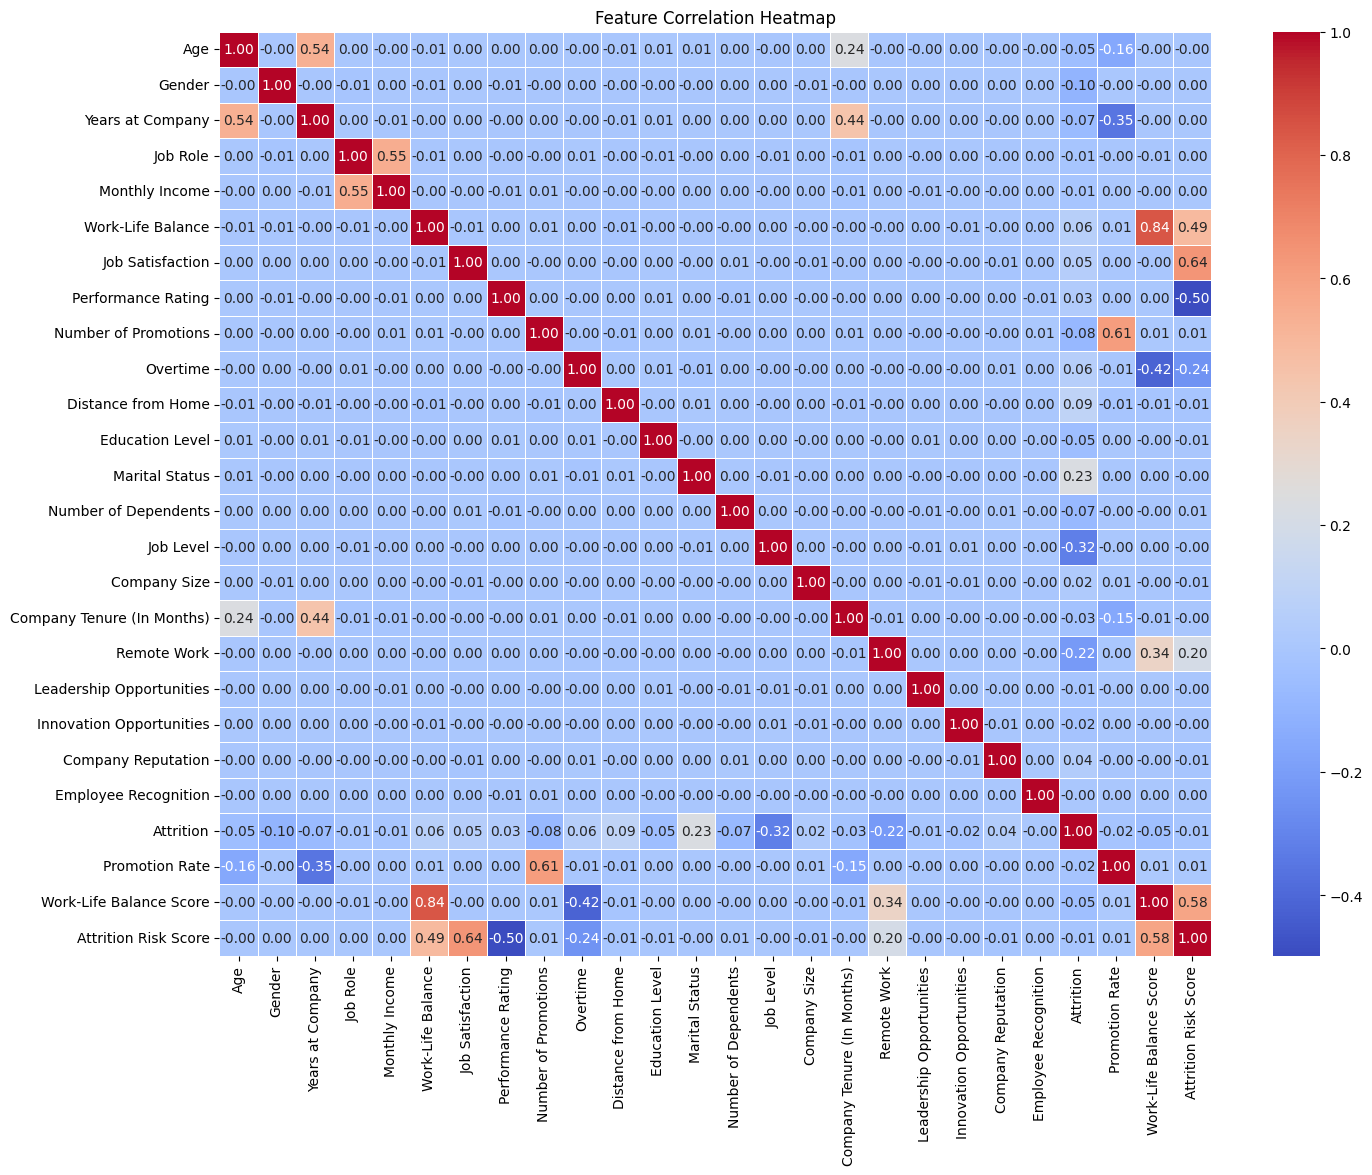

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Adjust figure size for better visualization
plt.figure(figsize=(16, 12))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Rotate the x and y labels for better readability if there are many columns
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Add a title
plt.title("Feature Correlation Heatmap")

# Display the plot
plt.show()


In [23]:
# Save the preprocessed data 
df.to_csv("processed_emp_attrition.csv", index=False)
# Display final dataset info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 70558 entries, 0 to 74497
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         70558 non-null  int64  
 1   Gender                      70558 non-null  int32  
 2   Years at Company            70558 non-null  int64  
 3   Job Role                    70558 non-null  int32  
 4   Monthly Income              70558 non-null  float64
 5   Work-Life Balance           70558 non-null  int32  
 6   Job Satisfaction            70558 non-null  int32  
 7   Performance Rating          70558 non-null  int32  
 8   Number of Promotions        70558 non-null  int64  
 9   Overtime                    70558 non-null  int32  
 10  Distance from Home          70558 non-null  float64
 11  Education Level             70558 non-null  int32  
 12  Marital Status              70558 non-null  int32  
 13  Number of Dependents        70558 no

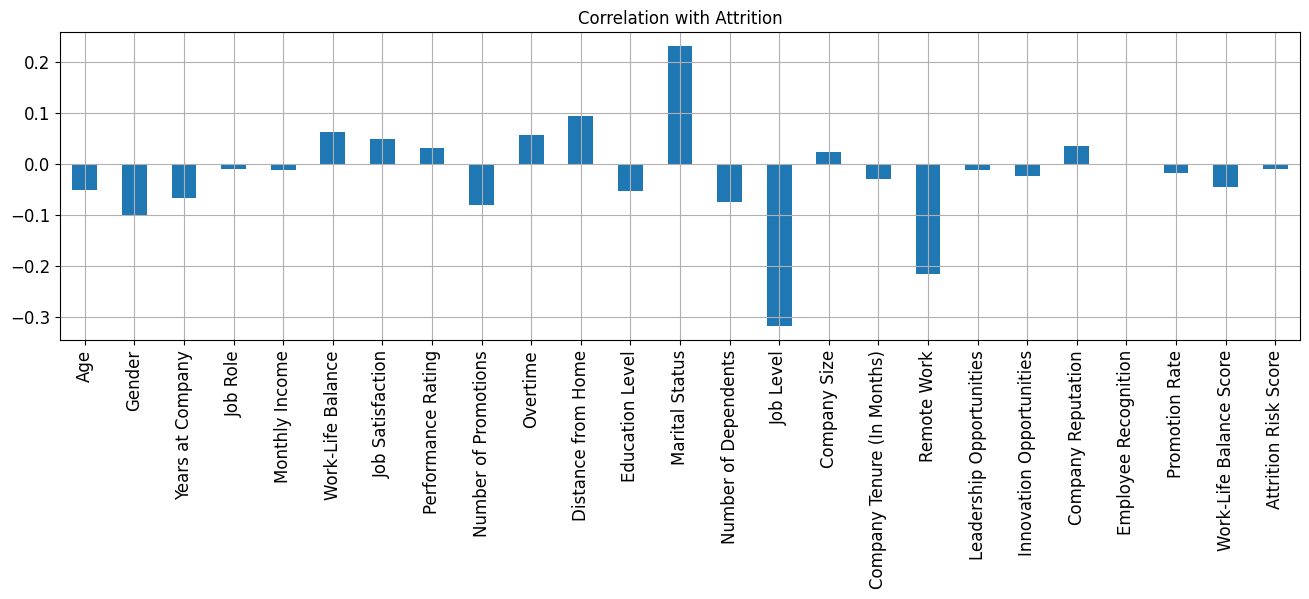

In [24]:
# Drop 'Attrition' column for correlation analysis
data_without_target = df.drop('Attrition', axis=1)

# Calculate the correlation between 'Attrition' and all other variables
correlation = data_without_target.corrwith(df['Attrition'])

# Plot the correlations as a bar chart
correlation.plot.bar(
    figsize=(16, 4), 
    title="Correlation with Attrition", 
    fontsize=12, 
    rot=90, 
    grid=True
)
plt.show()


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif_data)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature        VIF
0                          Age  13.282634
1                       Gender   2.175833
2             Years at Company   5.703806
3                     Job Role   4.383927
4               Monthly Income  14.583317
5            Work-Life Balance        inf
6             Job Satisfaction        inf
7           Performance Rating        inf
8         Number of Promotions   2.992297
9                     Overtime        inf
10          Distance from Home   3.903812
11             Education Level   2.477198
12              Marital Status   4.339626
13        Number of Dependents   2.088837
14                   Job Level   2.338808
15                Company Size   3.313753
16  Company Tenure (In Months)   6.793698
17                 Remote Work        inf
18    Leadership Opportunities   1.050529
19    Innovation Opportunities   1.190911
20          Company Reputation   4.891913
21        Employee Recognition   2.734103
22                   Attrition   2

In [26]:
df_numeric = df_numeric.drop(columns=["Years at Company", "Monthly Income"], errors="ignore")

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature       VIF
23        Attrition Risk Score       inf
7                     Overtime       inf
22     Work-Life Balance Score       inf
3            Work-Life Balance       inf
4             Job Satisfaction       inf
5           Performance Rating       inf
15                 Remote Work       inf
0                          Age  9.780829
14  Company Tenure (In Months)  5.926337
18          Company Reputation  4.793554
10              Marital Status  4.296212
8           Distance from Home  3.854513
13                Company Size  3.277184
2                     Job Role  2.917124
6         Number of Promotions  2.811985
19        Employee Recognition  2.711127
20                   Attrition  2.476835
9              Education Level  2.459154
12                   Job Level  2.317318
1                       Gender  2.157808
21              Promotion Rate  2.128330
11        Number of Dependents  2.076359
17    Innovation Opportunities  1.189832
16    Leadership

In [27]:
# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# Filter out infinite values
vif_data = vif_data[vif_data["VIF"] != np.inf]

print(vif_data.sort_values(by="VIF", ascending=False))


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature       VIF
0                          Age  9.780829
14  Company Tenure (In Months)  5.926337
18          Company Reputation  4.793554
10              Marital Status  4.296212
8           Distance from Home  3.854513
13                Company Size  3.277184
2                     Job Role  2.917124
6         Number of Promotions  2.811985
19        Employee Recognition  2.711127
20                   Attrition  2.476835
9              Education Level  2.459154
12                   Job Level  2.317318
1                       Gender  2.157808
21              Promotion Rate  2.128330
11        Number of Dependents  2.076359
17    Innovation Opportunities  1.189832
16    Leadership Opportunities  1.050367


<Axes: xlabel='Attrition', ylabel='count'>

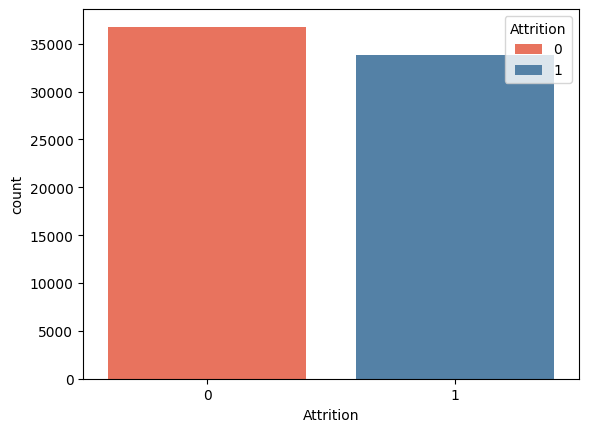

In [28]:
#class imbalance
custom_colors = ["#FF6347", "#4682B4"] 
sns.countplot(x='Attrition', data=df,palette=custom_colors, hue='Attrition')

In [29]:
# VIF data (filtered for features with VIF < 10 and excluding 'inf' columns)
selected_features = ["Age", "Gender","Job Role", "Number of Promotions", 
                     "Distance from Home", "Education Level", "Marital Status", 
                     "Number of Dependents", "Job Level", "Company Size", 
                     "Company Tenure (In Months)", "Leadership Opportunities", 
                     "Innovation Opportunities", "Company Reputation", "Employee Recognition", 
                     "Attrition", "Promotion Rate"]

# Select only the relevant features (filtered based on VIF < 10)
X = df[selected_features].drop(columns=["Attrition"])  # Remove target column from features
y = df["Attrition"] 

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increasing max_iter if convergence is an issue
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
log_reg_accuracy  = accuracy_score(y_test, y_pred)
print(f'Accuracy: {log_reg_accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6834

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70      7354
           1       0.67      0.66      0.67      6758

    accuracy                           0.68     14112
   macro avg       0.68      0.68      0.68     14112
weighted avg       0.68      0.68      0.68     14112


Confusion Matrix:
 [[5170 2184]
 [2284 4474]]


In [30]:
# VIF data (filtered for features with VIF < 10 and excluding 'inf' columns)
selected_features = ["Age", "Gender", "Job Role", "Number of Promotions", 
                     "Distance from Home", "Education Level", "Marital Status", 
                     "Number of Dependents", "Job Level", "Company Size", 
                     "Company Tenure (In Months)", "Leadership Opportunities", 
                     "Innovation Opportunities", "Company Reputation", "Employee Recognition", 
                     "Attrition", "Promotion Rate"]

# Select only the relevant features (filtered based on VIF < 10)
X = df[selected_features].drop(columns=["Attrition"])  # Remove target column from features
y = df["Attrition"] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for Random Forest too)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators for better performance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6967

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      7354
           1       0.69      0.67      0.68      6758

    accuracy                           0.70     14112
   macro avg       0.70      0.70      0.70     14112
weighted avg       0.70      0.70      0.70     14112


Confusion Matrix:
 [[5323 2031]
 [2249 4509]]


In [31]:

# Choose the best model based on accuracy
if log_reg_accuracy > rf_accuracy:
   print("The Best Model is: Logistic Regression") 
else:
    print("The Best Model is: Random Forest")

The Best Model is: Random Forest


In [32]:
#Model Tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV                                                                                                        # Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist,
    n_iter=20,  # Number of random samples to test
    cv=5,       # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
rf_random.fit(X_train, y_train)                                                                                                                                                   # Get the best parameters
best_params = rf_random.best_params_
print(f"Best Parameters: {best_params}")                                                                                                                                    # Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best = best_rf.predict(X_test)                                                                                                                                         # Evaluate the model
rf_tuned_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Tuned Random Forest Accuracy: {rf_tuned_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Tuned Random Forest Accuracy: 0.7090

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      7354
           1       0.70      0.68      0.69      6758

    accuracy                           0.71     14112
   macro avg       0.71      0.71      0.71     14112
weighted avg       0.71      0.71      0.71     14112


Confusion Matrix:
 [[5435 1919]
 [2187 4571]]


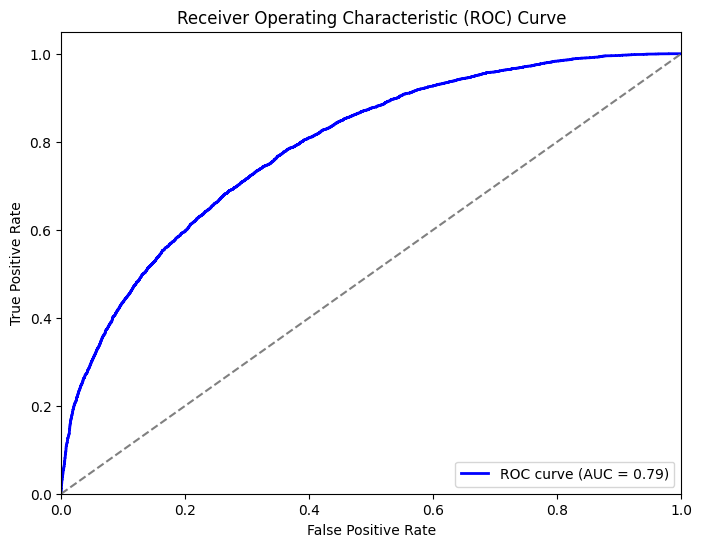

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()